In [ ]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
def plot_predictions(model, X_test, Y_test):
  T = X_test.shape[1]
  D = X_test.shape[2]

  validation_target = Y_test
  validation_predictions_one_step = []
  validation_predictions_future_forecast = []
  
  # one step prediction
  for t in X_test:
    pred = model.predict(t.reshape(1,T,D))
    prediction = pred[0,0]
    validation_predictions_one_step.append(prediction)
    
  # future predictions
  x = X_test[0]
  for t in X_test:
    pred = model.predict(x.reshape(1,T,D))
    prediction = pred[0,0]
    validation_predictions_future_forecast.append(prediction)
    x[:-1,:] = x[1:,:]
    x[-1,:] = prediction


  # plot
  plt.figure(figsize=(40,10))
  plt.subplot(1,2,1)
  plt.plot(validation_target, label='forecast target')
  plt.plot(validation_predictions_one_step, label='forecast prediction')
  plt.title('One Step Prediction')
  plt.legend();

  plt.subplot(1,2,2)
  plt.plot(validation_target, label='forecast target')
  plt.plot(validation_predictions_future_forecast, label='forecast prediction')
  plt.title('Long term prediction')
  plt.legend();

  plt.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [ ]:
series = df['close'].values.reshape(-1, 1)
series_val_idx = -1 * series.shape[0] // 2
scaler = StandardScaler()
scaler.fit(series[:-series.shape[0]//2])
series = scaler.transform(series).flatten()

In [ ]:
T = 10
N = len(series)
D = 1
M = 5
idx = -N//2

X = []
Y = []
for t in range(N-T):
  X.append(series[t:t+T])
  Y.append(series[t+T])

X = np.array(X).reshape(-1,T,D)
Y = np.array(Y)

print('X shape:', X.shape, ', Y shape:', Y.shape)

X shape: (1249, 10, 1) , Y shape: (1249,)


Epoch 1/100
20/20 [==============================] - 2s 26ms/step - loss: 0.2793 - val_loss: 0.5114
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0184 - val_loss: 0.0748
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.0474
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0063 - val_loss: 0.0635
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0060 - val_loss: 0.0394
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0419
Epoch 7/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0063 - val_loss: 0.0562
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0061 - val_loss: 0.0406
Epoch 9/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0057 - val_loss: 0.0385
Epoch 10/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0054 - val_loss: 0.0432
Epoch 11

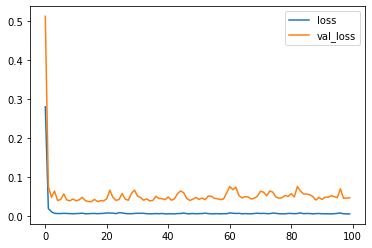

In [ ]:
i = Input((T, D))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))
history = model.fit(X[:idx], Y[:idx], epochs=100, validation_data=(X[idx:], Y[idx:]))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend();

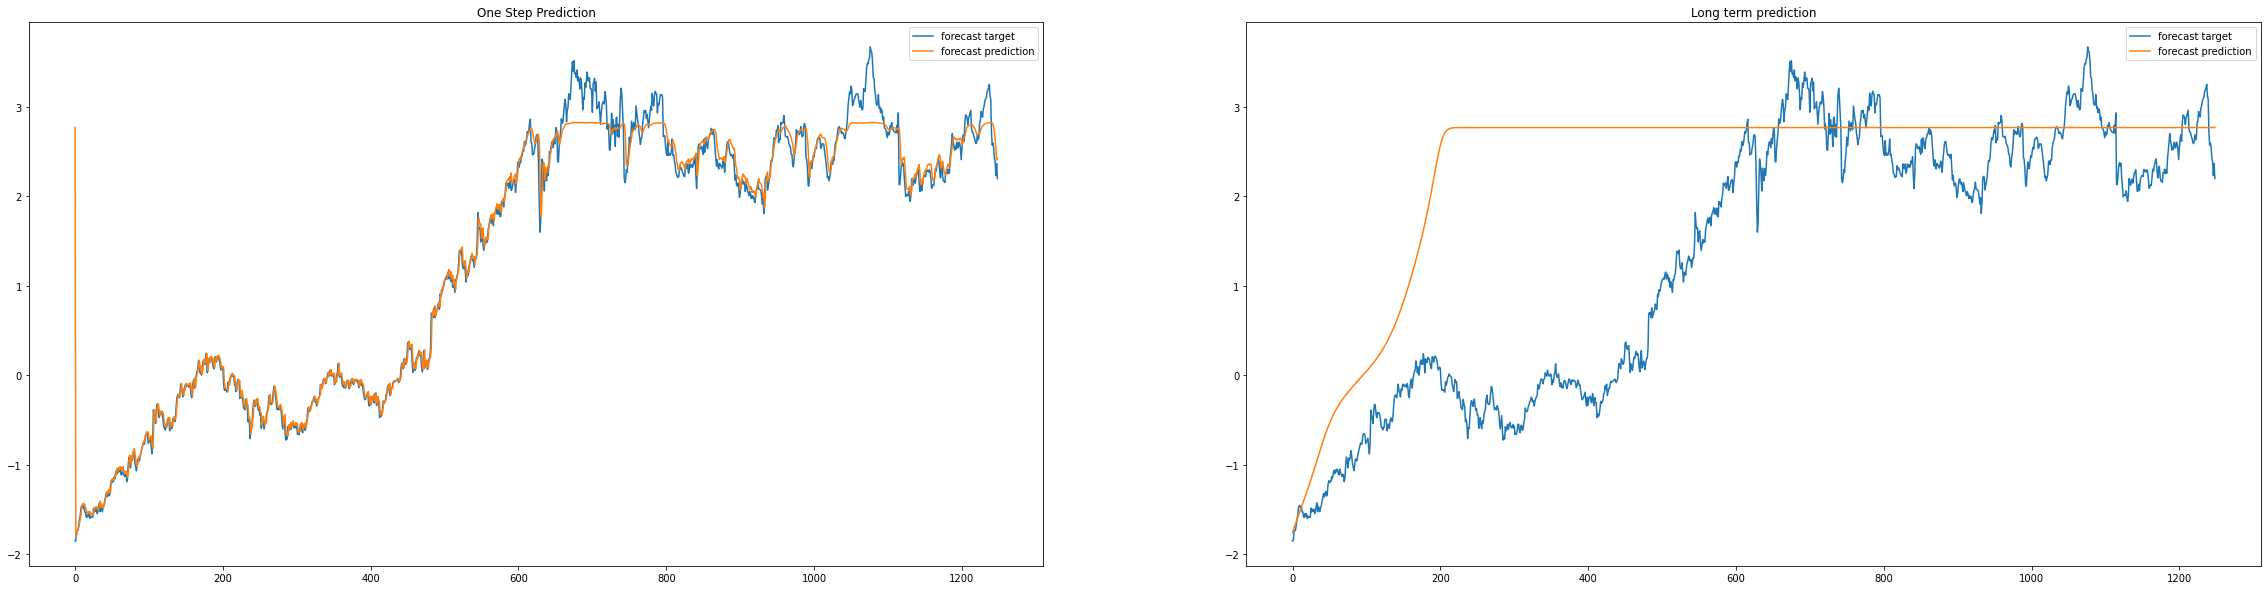

In [ ]:
plot_predictions(model, X, Y)

,date,open,high,low,close,volume,Name,PrevClose,Return
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


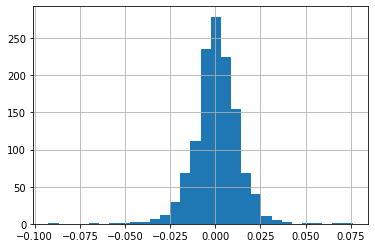

In [ ]:
df['PrevClose'] = df['close'].shift(1)
df['Return'] = (df['close'] - df['PrevClose']) / df['PrevClose']
df['Return'].hist(bins=30);
df.head()

In [ ]:
series_return = df['Return'].values[1:].reshape(-1, 1)
scaler_return = StandardScaler()
scaler_return.fit(series_return[:-len(series_return)//2])
series_return = scaler_return.transform(series_return).flatten()

In [ ]:
T = 10
N = len(series_return)
D = 1
M = 5
idx = -N//2

X = []
Y = []
for t in range(N-T):
  X.append(series_return[t:t+T])
  Y.append(series_return[t+T])

X = np.array(X).reshape(-1,T,D)
Y = np.array(Y)

print('X shape:', X.shape, ', Y shape:', Y.shape)

X shape: (1248, 10, 1) , Y shape: (1248,)


Epoch 1/100
20/20 [==============================] - 2s 27ms/step - loss: 1.0020 - val_loss: 1.1484
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9893 - val_loss: 1.1458
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.9877 - val_loss: 1.1403
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9854 - val_loss: 1.1452
Epoch 5/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9848 - val_loss: 1.1473
Epoch 6/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9840 - val_loss: 1.1512
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9748 - val_loss: 1.1513
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9682 - val_loss: 1.1890
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9727 - val_loss: 1.2219
Epoch 10/100
20/20 [==============================] - 0s 7ms/step - loss: 0.9956 - val_loss: 1.1575
Epoch 11

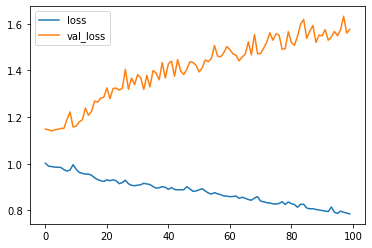

In [ ]:
i = Input((T, D))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(learning_rate=0.01))
history = model.fit(X[:idx], Y[:idx], epochs=100, validation_data=(X[idx:], Y[idx:]))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend();

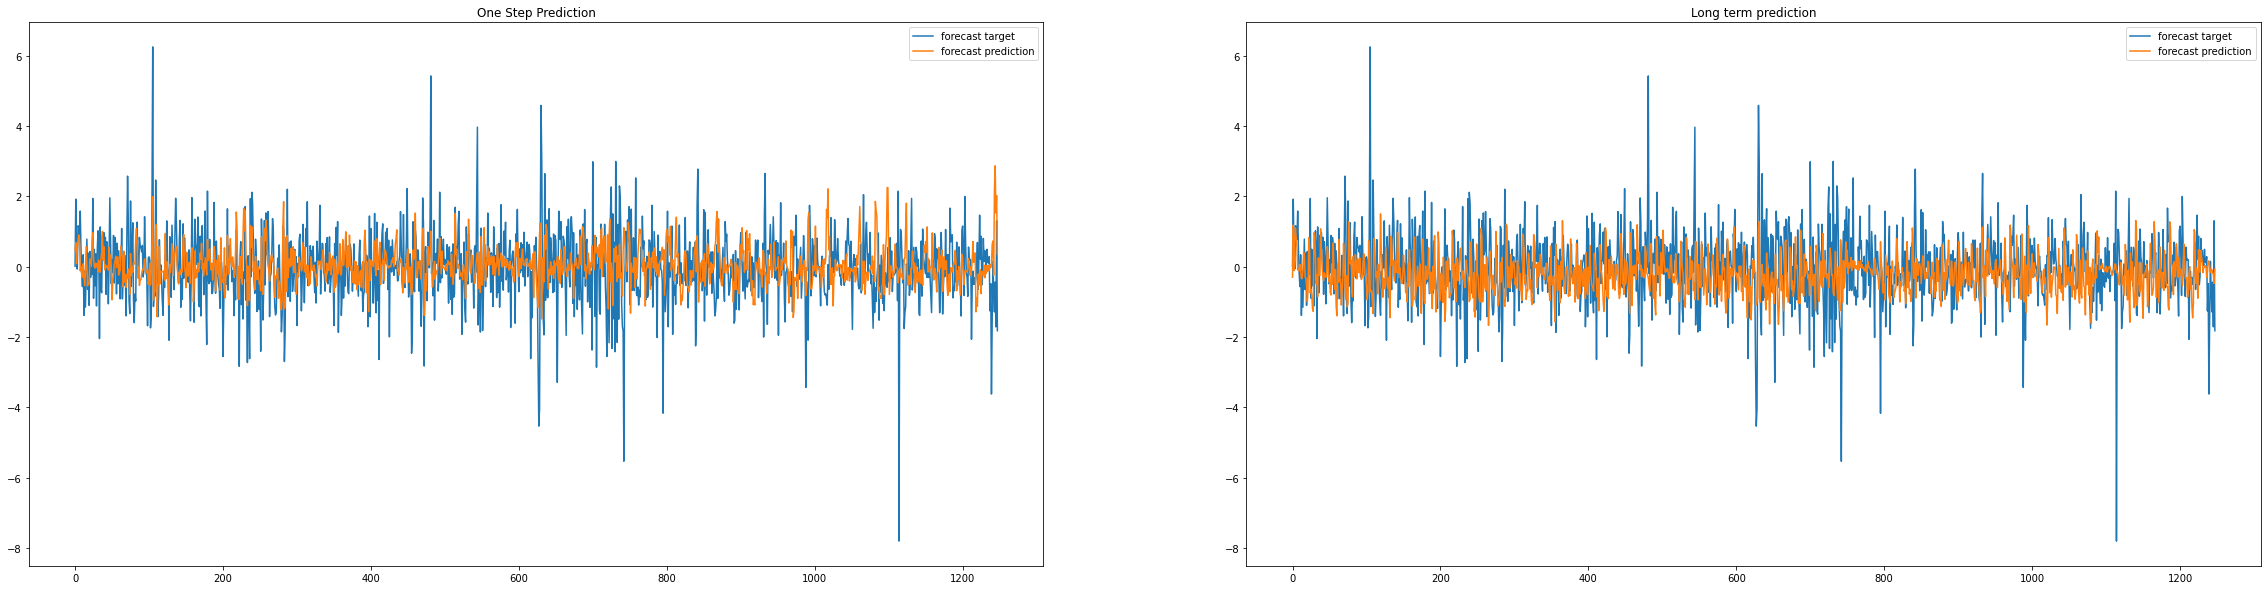

In [ ]:
plot_predictions(model, X, Y)

In [ ]:
input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

T = 10
D = input_data.shape[1]
N = len(input_data) - T
M = 50

Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T - 1])
input_data = scaler.transform(input_data)


X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)
X_test = np.zeros((N - Ntrain, T, D))
Y_test = np.zeros(N - Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

for u in range(N - Ntrain):
  # u counts from 0...(N - Ntrain)
  # t counts from Ntrain...N
  t = u + Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
27/27 [==============================] - 2s 22ms/step - loss: 0.6944 - accuracy: 0.5161 - val_loss: 0.6960 - val_accuracy: 0.4805
Epoch 2/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.5316 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5197 - val_loss: 0.6945 - val_accuracy: 0.4902
Epoch 4/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.5256 - val_loss: 0.6914 - val_accuracy: 0.5366
Epoch 5/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.5173 - val_loss: 0.6906 - val_accuracy: 0.5439
Epoch 6/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6902 - accuracy: 0.5340 - val_loss: 0.6997 - val_accuracy: 0.4902
Epoch 7/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6911 - accuracy: 0.5089 - val_loss: 0.6915 - val_accuracy: 0.5195
Epoch 8/300


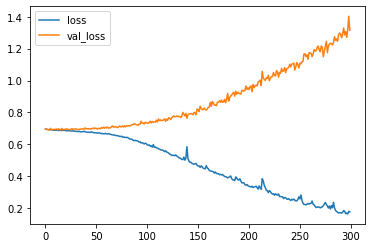

In [ ]:
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=32, epochs=300, validation_data=(X_test, Y_test))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend();

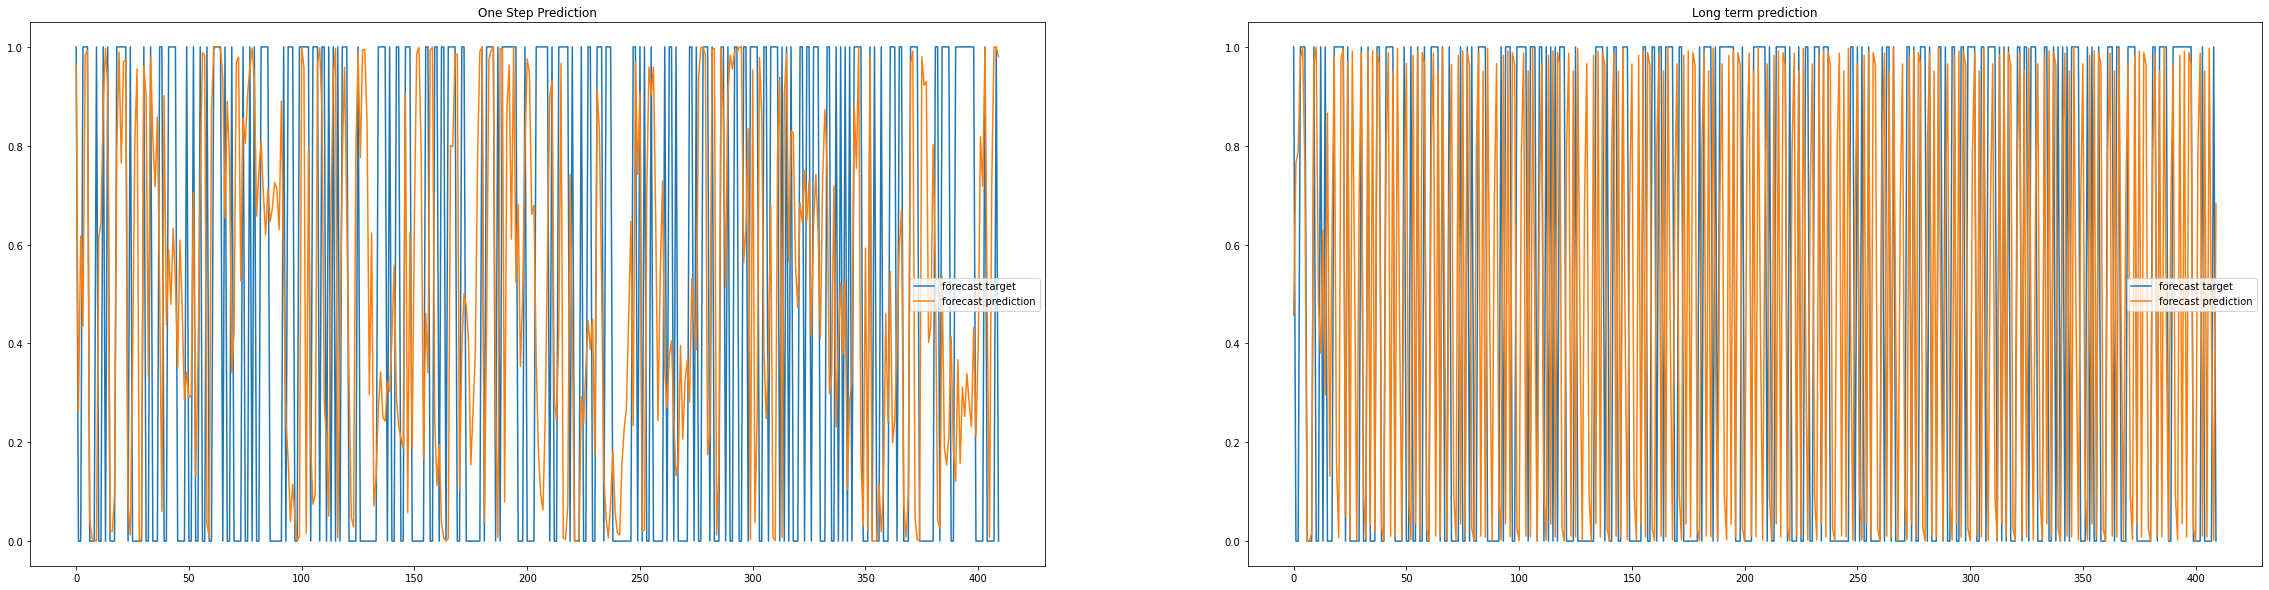

In [ ]:
plot_predictions(model, X_test, Y_test)